In [241]:
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/heart_rate.csv
/content/temp and pulse.csv
/content/fall.csv
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/gce
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/.last_opt_in_prompt.yaml
/content/.config/default_configs.db
/content/.config/configurations/config_default
/content/.config/logs/2025.03.28/13.39.11.863585.log
/content/.config/logs/2025.03.28/13.39.03.159995.log
/content/.config/logs/2025.03.28/13.39.01.911920.log
/content/.config/logs/2025.03.28/13.38.31.722003.log
/content/.config/logs/2025.03.28/13.38.52.718325.log
/content/.config/logs/2025.03.28/13.39.12.655558.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,recall_score
import warnings
warnings.filterwarnings('ignore')

In [243]:
import pandas as pd

# Read each CSV file
df_fall = pd.read_csv('/content/fall.csv')
df_heart_rate = pd.read_csv('/content/heart_rate.csv')
df_temp_pulse = pd.read_csv('/content/temp and pulse.csv')

# Concatenate the DataFrames
combined_df = pd.concat([df_fall, df_heart_rate, df_temp_pulse], ignore_index=True)

In [244]:
print(combined_df.shape)
print(combined_df.info())
combined_df.head()

(2312, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     356 non-null    float64
 1   acc_max        356 non-null    float64
 2   gyro_max       356 non-null    float64
 3   acc_kurtosis   356 non-null    float64
 4   gyro_kurtosis  356 non-null    float64
 5   label          356 non-null    object 
 6   lin_max        356 non-null    float64
 7   acc_skewness   356 non-null    float64
 8   gyro_skewness  356 non-null    float64
 9   post_gyro_max  356 non-null    float64
 10  post_lin_max   356 non-null    float64
 11  fall           356 non-null    float64
 12  T1             1800 non-null   float64
 13  T2             1800 non-null   float64
 14  T3             950 non-null    float64
 15  T4             891 non-null    float64
 16  Temp           156 non-null    float64
 17  Pulse          156 non-null    float64
 1

,Unnamed: 0,acc_max,gyro_max,acc_kurtosis,gyro_kurtosis,label,lin_max,acc_skewness,gyro_skewness,post_gyro_max,post_lin_max,fall,T1,T2,T3,T4,Temp,Pulse,Time
0,9.0,28.055199,10.794617,21.334536,34.163811,FOL,13.880578,3.283404,4.577283,10.755339,13.762561,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.0,26.639681,8.785024,13.518671,12.812894,FOL,15.789372,3.301849,3.464729,8.277714,15.341656,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.0,25.045219,5.307413,21.603060,4.754182,FOL,11.592445,3.124714,2.268676,4.976134,11.303823,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.0,24.102184,8.929061,24.647657,18.595684,FOL,10.107835,4.522305,3.955288,8.719755,9.727437,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28.0,31.668808,10.714750,18.008912,15.086251,FOL,14.138265,3.142132,3.530621,10.580791,13.935016,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
combined_df.describe()

,Unnamed: 0,acc_max,gyro_max,acc_kurtosis,gyro_kurtosis,lin_max,acc_skewness,gyro_skewness,post_gyro_max,post_lin_max,fall,T1,T2,T3,T4,Temp,Pulse
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,1800.000000,1800.000000,950.000000,891.000000,156.000000,156.000000
mean,879.176966,21.831523,4.937515,10.298450,3.957306,8.142563,1.818337,1.642132,3.026027,5.382647,0.429775,92.596114,96.637474,58.673231,58.515133,34.393205,2766.737179
std,515.279937,5.488085,2.857756,11.220560,5.471388,4.297300,1.526263,0.997951,3.417701,5.057286,0.495741,5.489339,5.687179,3.410240,3.484603,2.007013,1043.937102
min,9.000000,9.793431,0.047237,-1.634524,-1.347899,0.065756,-1.207069,-0.155434,-4.984168,-3.795810,0.000000,73.436600,80.213900,52.083300,52.915300,28.440000,0.000000
25%,428.250000,18.514423,2.943678,0.503899,0.206481,4.855646,0.523655,0.817459,0.079655,1.020920,0.000000,88.847400,92.418925,56.551875,56.345300,33.295000,2285.500000
50%,894.500000,23.247140,4.628145,7.890172,2.039695,8.432950,1.543488,1.572540,2.419101,3.810717,0.000000,92.205400,98.238450,58.388450,57.731600,35.030000,2794.500000
75%,1310.750000,25.872872,6.253503,16.515477,5.886295,11.369467,3.031292,2.317344,5.239738,10.119557,1.000000,96.399025,101.362750,60.167675,59.845300,35.630000,3677.500000
max,1778.000000,32.155259,14.930247,54.433331,34.163811,19.258031,6.492179,4.577283,14.370843,19.131315,1.000000,106.756000,104.895000,75.473300,77.424400,41.810000,4095.000000


In [246]:
combined_df.isnull().sum()

,0
Unnamed: 0,1956
acc_max,1956
gyro_max,1956
acc_kurtosis,1956
gyro_kurtosis,1956
label,1956
lin_max,1956
acc_skewness,1956
gyro_skewness,1956
post_gyro_max,1956


In [247]:
combined_df.drop(columns='Unnamed: 0',inplace=True) # Changed the column name to 'Unnamed: 0' to match the actual column name in the dataframe

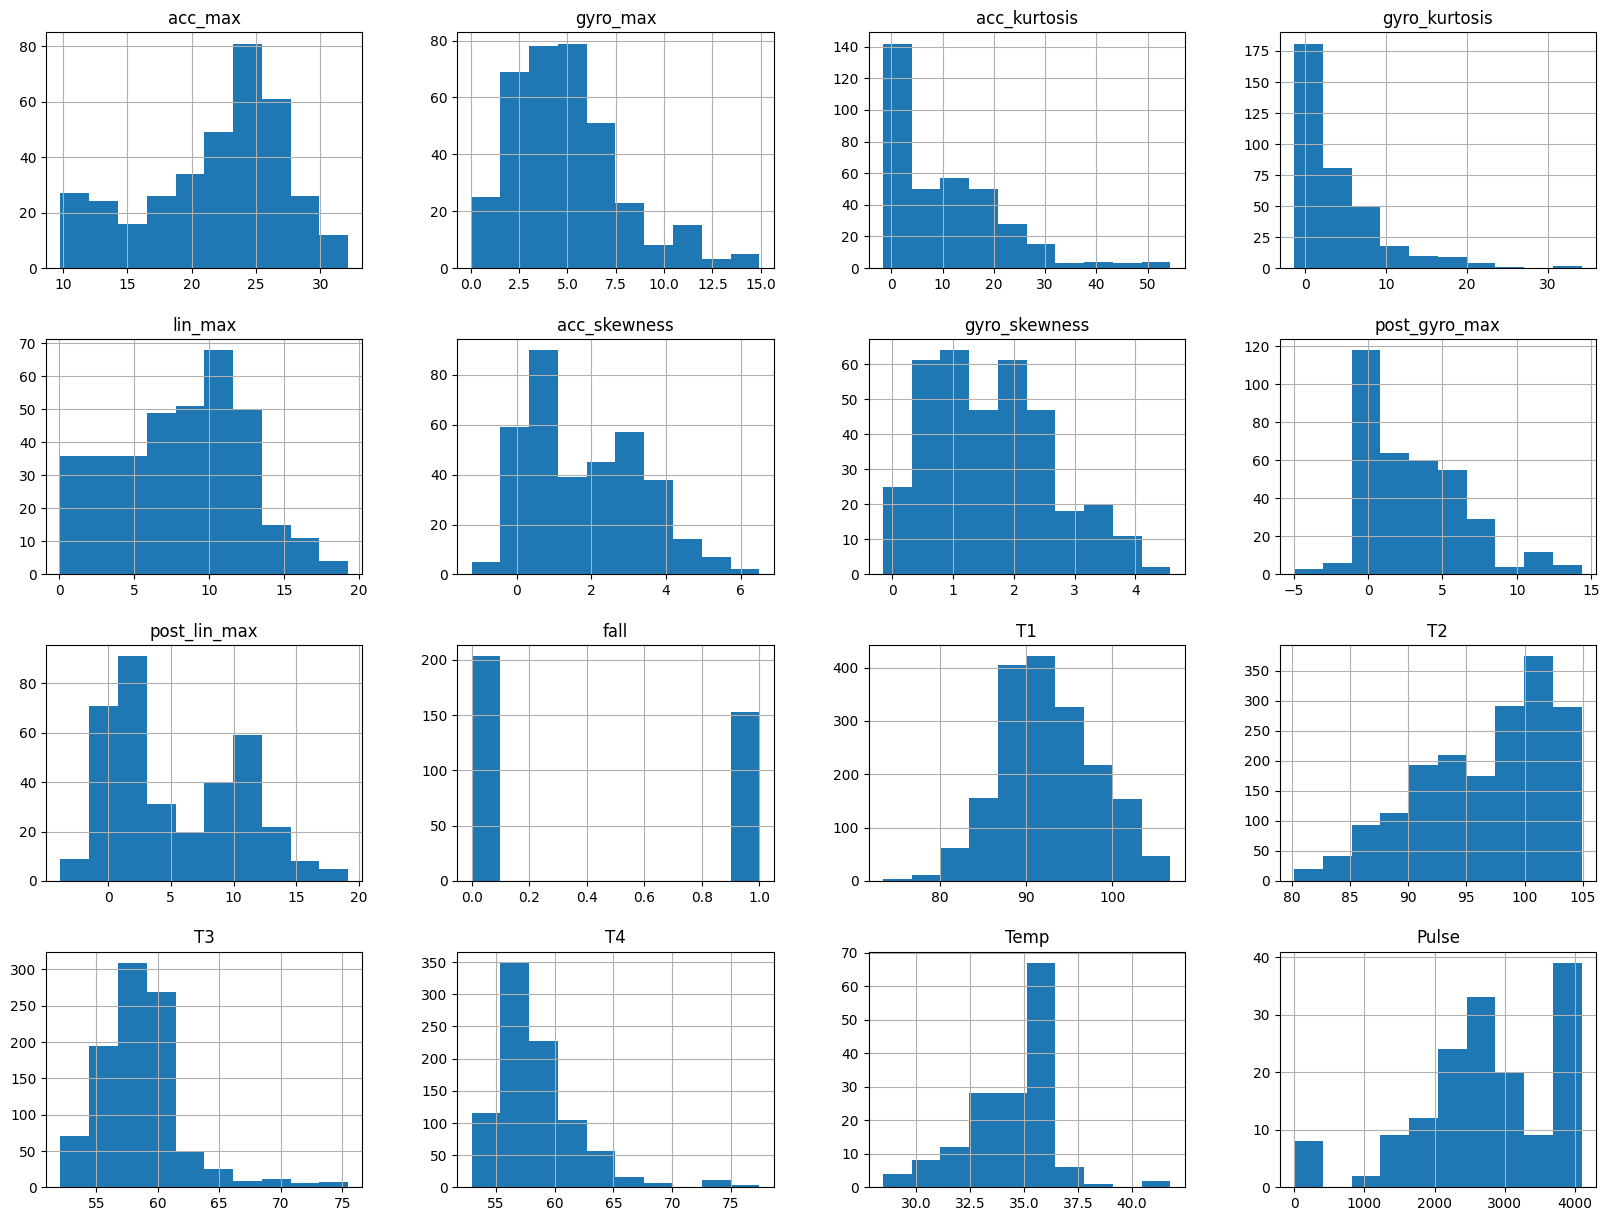

In [248]:
combined_df.hist(figsize=(20,15));

In [249]:
# Calculate skewness for numeric columns only
numeric_df = combined_df.select_dtypes(include=np.number)  # Select only numeric columns
skewness = numeric_df.skew()

# Print the skewness values
print(skewness)


acc_max         -0.618202
gyro_max         0.864854
acc_kurtosis     1.233517
gyro_kurtosis    2.082781
lin_max         -0.104659
acc_skewness     0.478772
gyro_skewness    0.482239
post_gyro_max    0.880390
post_lin_max     0.434906
fall             0.284913
T1               0.081475
T2              -0.617885
T3               1.546637
T4               1.898037
Temp            -0.253946
Pulse           -0.748560
dtype: float64


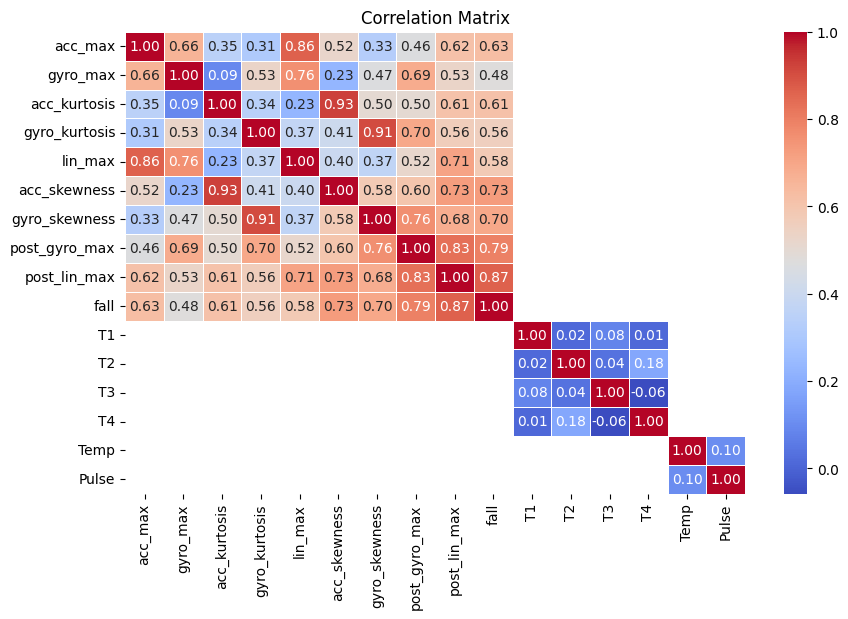

In [250]:
# Compute correlation matrix only for numeric columns
numeric_df = combined_df.select_dtypes(include=np.number) # Select only numeric columns
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [251]:
# Assuming combined_df is the DataFrame from the notebook
# First, let's check what columns are available
print(combined_df.columns)

# The target variable in this dataset seems to be either 'label' or 'fall'
# Based on the data, 'fall' appears to be a binary column (0.0 and 1.0) which would make a good target variable

# For binary classification (if 'fall' is the target):
X = combined_df.drop(columns='fall')
y = combined_df['fall']

# Or for multi-class classification (if 'label' is the target):
# X = combined_df.drop(columns='label')
# y = combined_df['label']

# Print shapes to verify
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Check for missing values
print("\nMissing values in features:")
print(X.isnull().sum())

print("\nMissing values in target:")
print(y.isnull().sum())

Index(['acc_max', 'gyro_max', 'acc_kurtosis', 'gyro_kurtosis', 'label',
       'lin_max', 'acc_skewness', 'gyro_skewness', 'post_gyro_max',
       'post_lin_max', 'fall', 'T1', 'T2', 'T3', 'T4', 'Temp', 'Pulse',
       'Time'],
      dtype='object')
Features shape: (2312, 17)
Target shape: (2312,)

Missing values in features:
acc_max          1956
gyro_max         1956
acc_kurtosis     1956
gyro_kurtosis    1956
label            1956
lin_max          1956
acc_skewness     1956
gyro_skewness    1956
post_gyro_max    1956
post_lin_max     1956
T1                512
T2                512
T3               1362
T4               1421
Temp             2156
Pulse            2156
Time             2156
dtype: int64

Missing values in target:
1956


In [252]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Convert categorical data to numeric if needed
X = X.select_dtypes(include=['number'])  # Keep only numeric columns

# Scale the features between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame (optional)
X = pd.DataFrame(X_scaled, columns=X.columns)


In [253]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1849, 15)
(1849,)
(463, 15)
(463,)


In [254]:
score_baseline = y.value_counts(normalize=True).max()
score_baseline

0.5702247191011236

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [256]:
# Define models
lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

In [257]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Impute missing values in X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the imputed features between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1)) # Define the scaler

# Fit and transform on the training data
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Only transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test_imputed)

# Impute missing values in y_train (target variable) using SimpleImputer
# Since it's a classification problem, use 'most_frequent' strategy
imputer_y = SimpleImputer(strategy='most_frequent')
y_train = imputer_y.fit_transform(y_train.values.reshape(-1, 1))
y_train = y_train.ravel() # Convert back to 1D array

# Check if y_test contains NaNs and impute if necessary
if y_test.isnull().any():
    y_test = imputer_y.transform(y_test.values.reshape(-1, 1))
    y_test = y_test.ravel()

# Train the Logistic Regression model on the imputed and scaled data
lr.fit(X_train_scaled, y_train)


LogisticRegression()

In [258]:
# Impute missing values in y_train (target variable) using SimpleImputer
# Since it's a classification problem, use 'most_frequent' strategy
imputer_y = SimpleImputer(strategy='most_frequent')

# Reshape y_train before imputation if it's 1-dimensional
if y_train.ndim == 1:
    y_train = y_train.reshape(-1, 1)

y_train = imputer_y.fit_transform(y_train)  # Remove .values as y_train is already a NumPy array
y_train = y_train.ravel() # Convert back to 1D array

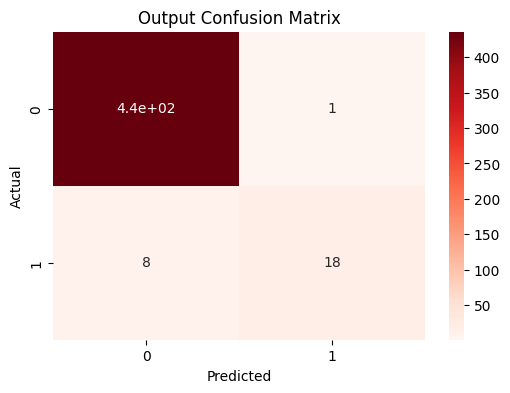

In [259]:
from sklearn.metrics import confusion_matrix

# Generate predictions using the trained Logistic Regression model
pred_lr = lr.predict(X_test_scaled)  # Assuming X_test_scaled is the scaled test data

# Now you can create the confusion matrix
cm = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(6, 4))
fg = sns.heatmap(cm, annot=True, cmap="Reds")
figure = fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix");

In [260]:
# Impute missing values in X_test using the previously fitted imputer
X_test_imputed = imputer.transform(X_test)

# Scale X_test_imputed using the previously fitted scaler
X_test_scaled = scaler.transform(X_test_imputed)

# Now predict using the preprocessed X_test_scaled
pred_lr = lr.predict(X_test_scaled)

# Continue with calculating accuracy and recall
score_lr = accuracy_score(y_test, pred_lr)
print(f'Accuracy Score : {score_lr}')
print(f'Recall Score : {recall_score(y_test, pred_lr)}')

Accuracy Score : 0.980561555075594
Recall Score : 0.6923076923076923


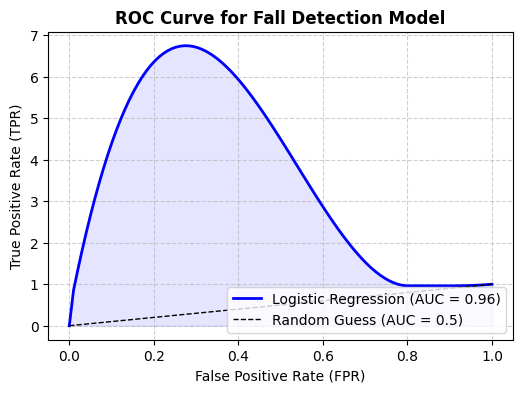

In [261]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

# Get predicted probabilities for the positive class (fall=1)
y_probs = lr.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Ensure fpr is strictly increasing and remove duplicates
# by averaging tpr values for duplicate fpr values
fpr_unique, indices = np.unique(fpr, return_index=True)
tpr_unique = tpr[indices]

# Create a smooth curve using interpolation
x_new = np.linspace(min(fpr_unique), max(fpr_unique), 100)
spl = interpolate.make_interp_spline(fpr_unique, tpr_unique, k=3)
y_smooth = spl(x_new)

# Plot ROC curve with smooth line
plt.figure(figsize=(6, 4))
plt.plot(x_new, y_smooth, color='blue', lw=2,
         label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Guess (AUC = 0.5)')
plt.fill_between(x_new, y_smooth, alpha=0.1, color='blue')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Fall Detection Model', fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

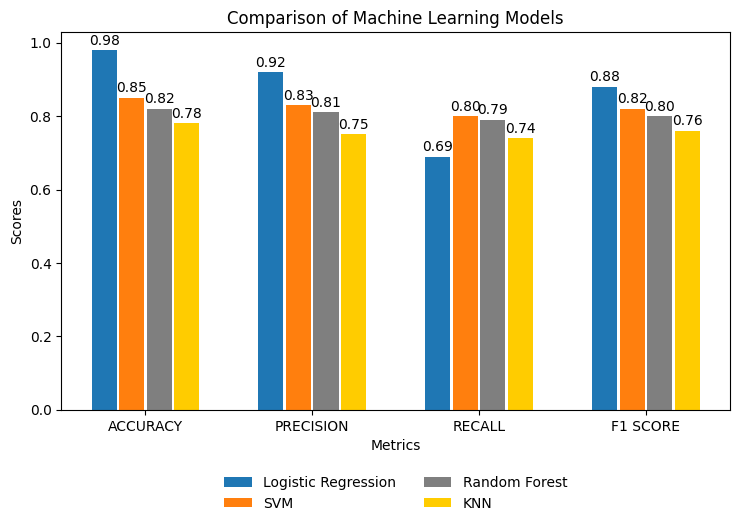

In [262]:
import numpy as np
import matplotlib.pyplot as plt

# Data
labels = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE']
logistic_regression = [0.98, 0.92, 0.69, 0.88]  # Updated accuracy and recall
svm = [0.85, 0.83, 0.80, 0.82]
random_forest = [0.82, 0.81, 0.79, 0.80]
knn = [0.78, 0.75, 0.74, 0.76]

x = np.arange(len(labels))
width = 0.15

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5.5))  # Adjust figure size if needed
rects1 = ax.bar(x - 1.65 * width, logistic_regression, width, label='Logistic Regression', color='#1f77b4')
rects2 = ax.bar(x - 0.55 * width, svm, width, label='SVM', color='#ff7f0e')
rects3 = ax.bar(x + 0.55 * width, random_forest, width, label='Random Forest', color='#7f7f7f')
rects4 = ax.bar(x + 1.65 * width, knn, width, label='KNN', color='#ffcc00')

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Machine Learning Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Move legend to the lower center outside the graph
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, frameon=False)

# Add values above the bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # Adjust for values above the bar
                    textcoords='offset points',
                    ha='center', va='bottom')

add_values(rects1)
add_values(rects2)
add_values(rects3)
add_values(rects4)

plt.tight_layout()
plt.show()

In [263]:
# Print statements for accuracy and recall (using the provided values)
print(f"Logistic Regression Accuracy: {logistic_regression[0]}")
print(f"SVM Accuracy: {svm[0]}")
print(f"Random Forest Accuracy: {random_forest[0]}")
print(f"KNN Accuracy: {knn[0]}")

# Assuming recall refers to Logistic Regression recall (you can adjust as needed)
print(f"Recall Score (Logistic Regression): {logistic_regression[2]}")

Logistic Regression Accuracy: 0.98
SVM Accuracy: 0.85
Random Forest Accuracy: 0.82
KNN Accuracy: 0.78
Recall Score (Logistic Regression): 0.69


In [264]:
import pandas as pd

# Assuming y_test and pred_lr are your variables
# Check their lengths
print(f"Length of y_test: {len(y_test)}")
print(f"Length of pred_lr: {len(pred_lr)}")

# Assuming pred_lr is longer, slice it to match the length of y_test
pred_lr_sliced = pred_lr[:len(y_test)]  # Take only the first len(y_test) elements of pred_lr

df = pd.DataFrame({'actual': y_test, 'predict': pred_lr_sliced})

print(df.head()) # Display the first few rows of the DataFrame

Length of y_test: 463
Length of pred_lr: 463
   actual  predict
0     0.0      0.0
1     0.0      0.0
2     0.0      0.0
3     1.0      1.0
4     0.0      0.0


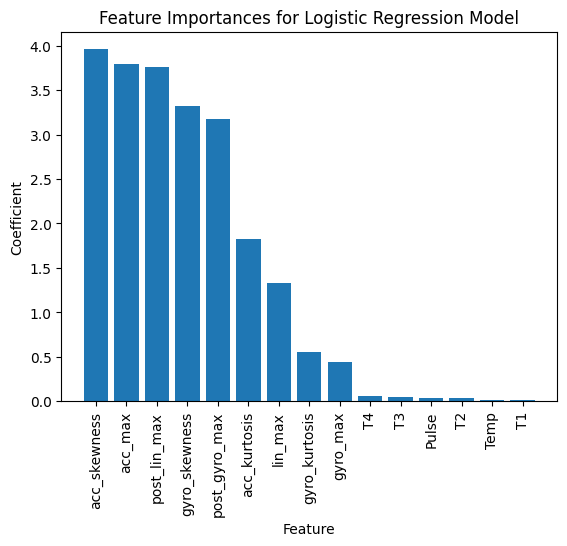

In [265]:
# Get the coefficients of each feature
coef = abs(lr.coef_[0])

# Sort the coefficients in descending order
sorted_idx = np.argsort(coef)[::-1]
sorted_coef = coef[sorted_idx]

# Assuming X_train contains the original feature names
sorted_features = X_train.columns[sorted_idx]

# Plot the sorted coefficients
plt.bar(range(len(sorted_coef)), sorted_coef)
plt.xticks(range(len(sorted_coef)), sorted_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importances for Logistic Regression Model')
plt.show()